## iPyLeaflet
[ipyleaflet](https://github.com/ellisonbg/ipyleaflet) is a bridge between jupyter notebooks and the [leaflet](http://leafletjs.com/)  javascript library for drawing maps.

ipyleaflet comes with a few examples notebooks (this notebook was derived from one) but very little documentation,
for more documentation read the [Leaflet IPA](http://leafletjs.com/reference.html)

For installation directions, see the README on [ipyleaflet](https://github.com/ellisonbg/ipyleaflet)

[GeoJson](https://tools.ietf.org/html/rfc7946#section-3.1.7) is a good way to add data on top of an ipyleaflet map.

For other backgrounds than open streets, you can alter the ipyleaflet.py file to point to one of [these map providers](https://leaflet-extras.github.io/leaflet-providers/preview/)

In [11]:
from ipyleaflet import (
    Map,
    Marker,
    TileLayer, ImageOverlay,
    Polyline, Polygon, Rectangle, Circle, CircleMarker,
    GeoJSON,
    DrawControl
)

## Visualizing the distribution of the observations

## Load the required libraries

In [12]:
import pandas as pd
import numpy as np
import sklearn as sk
import urllib
import math
import pylab as plt

import sys
sys.path.append('./lib')

from leaflet import *

In [13]:
data_dir = "../../Data/Weather/"
from pickle import load
with open(data_dir+'PRCP_residuals_PCA.pickle','rb') as file:
    Res_eig=load(file)
print Res_eig.keys()

#stations.pkl
with open(data_dir+'stations.pkl','rb') as file:
    Stations=load(file)
Stations.head()


['eigen-vecs', 'stations']


,latitude,longitude,elevation,state,name,GSNFLAG,HCNFLAG,WMOID
ACW00011604,17.1167,-61.7833,10.1,NaN,ST JOHNS COOLIDGE FLD,NaN,NaN,NaN
ACW00011647,17.1333,-61.7833,19.2,NaN,ST JOHNS,NaN,NaN,NaN
AE000041196,25.3330,55.5170,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0
AF000040930,35.3170,69.0170,3366.0,NaN,NORTH-SALANG,GSN,NaN,40930.0
AG000060390,36.7167,3.2500,24.0,NaN,ALGER-DAR EL BEIDA,GSN,NaN,60390.0


In [14]:
import pandas as pd
Eig=pd.DataFrame(Res_eig['eigen-vecs'].transpose())
Eig.head()

,0,1,2,3
0,-0.050746,-0.048421,0.122636,-0.138189
1,-0.121794,-0.132799,0.164543,-0.039343
2,-0.109721,-0.029603,0.021130,-0.006370
3,-0.117680,-0.024765,-0.020620,0.065599
4,-0.119310,-0.019368,-0.004842,0.044660


In [15]:
Eig['station']=Res_eig['stations']
Eig=Eig.set_index('station')
print Res_eig['stations'][:5]
Eig.head()

[u'USW00023183', u'USC00028112', u'US1AZMR0222', u'US1AZMR0220', u'USC00028598']


,0,1,2,3
station,,,,
USW00023183,-0.050746,-0.048421,0.122636,-0.138189
USC00028112,-0.121794,-0.132799,0.164543,-0.039343
US1AZMR0222,-0.109721,-0.029603,0.021130,-0.006370
US1AZMR0220,-0.117680,-0.024765,-0.020620,0.065599
USC00028598,-0.119310,-0.019368,-0.004842,0.044660


In [16]:
table=Eig.join(Stations,how='left')

In [17]:
table=table[['name','latitude','longitude','elevation',0,1,2,3]]
table.head(4)

,name,latitude,longitude,elevation,0,1,2,3
station,,,,,,,,
USW00023183,PHOENIX SKY HARBOR INTL AP,33.4278,-112.0039,337.4,-0.050746,-0.048421,0.122636,-0.138189
USC00028112,SOUTH PHOENIX,33.3814,-112.0700,352.0,-0.121794,-0.132799,0.164543,-0.039343
US1AZMR0222,PHOENIX 6.7 WSW,33.4094,-112.1810,308.8,-0.109721,-0.029603,0.021130,-0.006370
US1AZMR0220,PHOENIX 12.8 N,33.6258,-112.0591,444.1,-0.117680,-0.024765,-0.020620,0.065599


In [18]:
import pylab as plt
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [39]:
table[table['longitude'] < -116]

,name,latitude,longitude,elevation,0,1,2,3
station,,,,,,,,
USW00093138,PALM SPRINGS RGNL AP,33.8281,-116.5053,128.3,-0.126607,-0.016235,-0.032581,0.045972
USW00003104,DESERT RESORTS RGNL AP,33.6267,-116.1594,-36.0,-0.119326,-0.049864,0.058361,0.016466
USC00046635,PALM SPRINGS,33.8275,-116.5097,129.5,-0.093253,-0.023958,0.011710,-0.033764
USC00045860,MORONGO VALLEY NORTH,34.0864,-116.5622,958.6,-0.120077,-0.000042,-0.049499,0.003131
USC00046630,PALM DESERT,33.7333,-116.3833,59.4,-0.113364,-0.017700,-0.012054,-0.003854
USC00045502,MECCA FIRE STN,33.5714,-116.0767,-54.9,-0.106889,-0.012694,0.000195,-0.001529
US1CARV0004,DESERT HOT SPRINGS 3.0 NW,33.9855,-116.5415,408.1,-0.121688,-0.011414,-0.021956,0.015796
US1CASR0022,MORONGO VALLEY 2.3 NE,34.0867,-116.5618,960.7,-0.099028,0.056024,-0.204484,-0.047194
USC00042103,COYOTE CANYON,33.4333,-116.5000,694.9,-0.119682,-0.022389,-0.022312,0.026755


## Map

In [42]:
min_lat,max_lat,min_long,max_long = box = (33.3369,  34.1158, -116.5833, -111.7432)
center = [(min_lat+max_lat)/2, (min_long+max_long)/2]
zoom = 9
m = Map(default_tiles=TileLayer(opacity=0.2), center=center, zoom=zoom)
r = Rectangle(bounds=[[min_lat,min_long],[max_lat,max_long]], weight=5, fill_opacity=0.0)
m += r

lat_margin=(max_lat-min_lat)/4
long_margin=(max_long-min_long)/4
for index,row in table.iterrows():
    _lat=row['latitude']
    _long=row['longitude']
    for col in range(4):
        _coef=row[col]
        if np.isnan(_coef):
            continue
        r=abs(_coef)/5
        #print r
        color=colors[col]
        signs=[[+1,+1],[+1,-1],[-1,-1],[-1,+1]]
        lat_sign,long_sign=signs[col]
        triangle=[(_lat,_long),(_lat+lat_sign*r,_long),(_lat,_long+long_sign*r),(_lat,_long)]
        if _coef<0:
            poly= Polygon(locations=triangle, weight=0,
                    color=color, opacity=0, fill_opacity=0.7,
                    fill_color=color)
        else:
            poly= Polygon(locations=triangle, weight=2,
                    color=color, opacity=0.8, fill_opacity=0,
                    fill_color=color)
        m +=poly   
m    

### excercises:
* Add a legend that relates the colors to values.
* Leaflet supports a variety of maps. See if you can get a topographical map as the background.

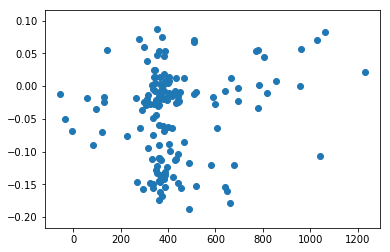

In [44]:
%matplotlib inline
#plt.plot.scatter(x='elevation',y='avg(coeff_1)');
plt.scatter(x=table[['elevation']],y=table[[1]])

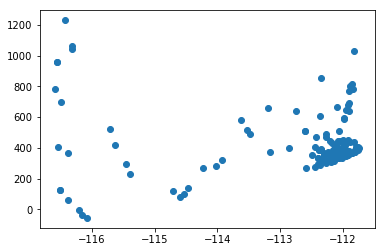

In [43]:
plt.scatter(x=table[['longitude']],y=table[['elevation']])